# LinkedIn Data Analyst Job Listings in Canada

This notebook provides a step by step analysis of Data Analyst Job listings in Canada posted on LinkedIn

## Data Exploration & Cleaning

### Setup and Data Loading

In [1]:
import pandas as pd

# Loading the dataset CSV file
df = pd.read_csv('../data/linkedin-jobs-canada.csv')

# Exploring the dataset
print(df.head(5))


print(df.info()) 
print(df.describe())  
print(df.columns) 

# Checking data info and missing values
df.isnull().sum()

          title                  company  \
0  Data Analyst                  Axonify   
1  Data Analyst               B3 Systems   
2  Data Analyst           Wood Mackenzie   
3  Data Analyst  LOFT Community Services   
4  Data Analyst             NAM Info Inc   

                                         description onsite_remote salary  \
0  Axonify is an intelligent workforce enablement...        onsite    NaN   
1  The ideal candidate will use their passion for...        onsite    NaN   
2  Company DescriptionWood Mackenzie is the globa...        onsite    NaN   
3  1 Part Time Permanent PositionDATE: November 1...        onsite    NaN   
4  Position: Data AnalystWork Locations: Toronto,...        onsite    NaN   

                    location  \
0  Waterloo, Ontario, Canada   
1   Toronto, Ontario, Canada   
2   Calgary, Alberta, Canada   
3   Toronto, Ontario, Canada   
4   Toronto, Ontario, Canada   

                                            criteria posted_date  \
0  [{'Senio

title               0
company             0
description         0
onsite_remote       0
salary           2737
location            0
criteria            0
posted_date         0
link                0
dtype: int64

In [8]:
#Removing duplicates
import pandas as pd

df = pd.read_csv('../data/linkedin-jobs-canada.csv')
df.drop_duplicates(inplace=True)

#Filling salary column with 'Not Specified'
df['salary'] = df['salary'].fillna('Not Specified')
df.head(5)

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link
0,Data Analyst,Axonify,Axonify is an intelligent workforce enablement...,onsite,Not Specified,"Waterloo, Ontario, Canada","[{'Seniority level': 'Entry level'}, {'Employm...",2022-10-24,https://ca.linkedin.com/jobs/view/data-analyst...
1,Data Analyst,B3 Systems,The ideal candidate will use their passion for...,onsite,Not Specified,"Toronto, Ontario, Canada",[{'Employment type': 'Full-time'}],2022-11-18,https://ca.linkedin.com/jobs/view/data-analyst...
2,Data Analyst,Wood Mackenzie,Company DescriptionWood Mackenzie is the globa...,onsite,Not Specified,"Calgary, Alberta, Canada","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-18,https://ca.linkedin.com/jobs/view/data-analyst...
3,Data Analyst,LOFT Community Services,1 Part Time Permanent PositionDATE: November 1...,onsite,Not Specified,"Toronto, Ontario, Canada",[{'Employment type': 'Part-time'}],2022-11-17,https://ca.linkedin.com/jobs/view/data-analyst...
4,Data Analyst,NAM Info Inc,"Position: Data AnalystWork Locations: Toronto,...",onsite,Not Specified,"Toronto, Ontario, Canada","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-11-08,https://ca.linkedin.com/jobs/view/data-analyst...


## Feature Engineering

In [10]:
#Categorizing job titles into broader roles (e.g., "Data Analyst", "Business Analyst")
import pandas as pd

def categorize_job_title(title):
    # Convert title to lowercase for case-insensitive matching
    title = title.lower().strip()
    
    # Defining categorization rules 
    if 'data scientist' in title or 'machine learning analyst' in title:
        return 'Data Scientist'
    elif 'data engineer' in title or 'data engineering analyst' in title:
        return 'Data Engineer'
    elif 'analytics engineer' in title or 'data analytics engineer' in title:
        return 'Analytics Engineer'
    elif 'bi analyst' in title or 'business intelligence analyst' in title or 'bi specialist' in title:
        return 'Business Intelligence Analyst'
    elif 'data analyst' in title or 'analyst, data' in title or 'data analytics specialist' in title or 'data insights analyst' in title:
        return 'Data Analyst'
    elif 'business analyst' in title or 'business data analyst' in title:
        return 'Business Analyst'
    elif 'reporting analyst' in title or 'report analyst' in title or 'data reporting specialist' in title:
        return 'Reporting Analyst'
    elif 'financial data analyst' in title or 'finance analyst' in title:
        return 'Financial Analyst'
    elif 'operations data analyst' in title or 'operational analyst' in title:
        return 'Operations Analyst'
    elif 'marketing data analyst' in title or 'marketing analytics specialist' in title:
        return 'Marketing Analyst'
    elif 'product data analyst' in title or 'product analytics specialist' in title:
        return 'Product Analyst'
    elif 'risk data analyst' in title or 'risk analytics specialist' in title:
        return 'Risk Analyst'
    elif 'hr data analyst' in title or 'people analytics specialist' in title:
        return 'HR Analyst'
    elif 'research data analyst' in title or 'data research specialist' in title:
        return 'Research Analyst'
    elif 'systems data analyst' in title or 'it data analyst' in title:
        return 'Systems Analyst'
    elif 'analyst' in title or 'analytics' in title:
        return 'Other Analyst'
    else:
        return 'Non-Analyst'

# Applying the function to the DataFrame
df['job_category'] = df['title'].apply(categorize_job_title)



# Displaying the distribution of job categories
print(df['job_category'].value_counts())

#Extracting years of experience from job description
df['experience_years'] = df['description'].str.extract(r'(\d+)\s+years').astype(float)
df.head(15)

job_category
Data Analyst                     2562
Other Analyst                     142
Data Engineer                      39
Business Intelligence Analyst      11
Reporting Analyst                   7
Non-Analyst                         6
Analytics Engineer                  6
Name: count, dtype: int64


,title,company,description,onsite_remote,salary,location,criteria,posted_date,link,job_category,experience_years
0,Data Analyst,Axonify,Axonify is an intelligent workforce enablement...,onsite,Not Specified,"Waterloo, Ontario, Canada","[{'Seniority level': 'Entry level'}, {'Employm...",2022-10-24,https://ca.linkedin.com/jobs/view/data-analyst...,Data Analyst,2.0
1,Data Analyst,B3 Systems,The ideal candidate will use their passion for...,onsite,Not Specified,"Toronto, Ontario, Canada",[{'Employment type': 'Full-time'}],2022-11-18,https://ca.linkedin.com/jobs/view/data-analyst...,Data Analyst,2.0
2,Data Analyst,Wood Mackenzie,Company DescriptionWood Mackenzie is the globa...,onsite,Not Specified,"Calgary, Alberta, Canada","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-18,https://ca.linkedin.com/jobs/view/data-analyst...,Data Analyst,45.0
3,Data Analyst,LOFT Community Services,1 Part Time Permanent PositionDATE: November 1...,onsite,Not Specified,"Toronto, Ontario, Canada",[{'Employment type': 'Part-time'}],2022-11-17,https://ca.linkedin.com/jobs/view/data-analyst...,Data Analyst,2.0
4,Data Analyst,NAM Info Inc,"Position: Data AnalystWork Locations: Toronto,...",onsite,Not Specified,"Toronto, Ontario, Canada","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-11-08,https://ca.linkedin.com/jobs/view/data-analyst...,Data Analyst,NaN
5,Data Analyst,Citi,Job Id: 22544507This role is for a Data Analys...,onsite,Not Specified,"Mississauga, Ontario, Canada","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-15,https://ca.linkedin.com/jobs/view/data-analyst...,Data Analyst,NaN
6,Data Analyst,King's College London,Job DescriptionKing’s Technology Evaluation Ce...,onsite,Not Specified,"St Thomas, Ontario, Canada","[{'Seniority level': 'Entry level'}, {'Employm...",2022-11-02,https://ca.linkedin.com/jobs/view/data-analyst...,Data Analyst,NaN
7,Data Analyst (Remote),Cognizant Microsoft Business Group,Join a team of passionate thought leaders in a...,onsite,Not Specified,"Toronto, Ontario, Canada","[{'Seniority level': 'Entry level'}, {'Employm...",2022-11-18,https://ca.linkedin.com/jobs/view/data-analyst...,Data Analyst,NaN
8,Data Analyst - Loans,Tata Consultancy Services,Skills Required:• Proficient in using SQL for ...,onsite,Not Specified,"Mississauga, Ontario, Canada","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-09,https://ca.linkedin.com/jobs/view/data-analyst...,Data Analyst,NaN
9,Data Analyst,VUBIQUITY,"Overview Who are we? Vubiquity, an Amdocs comp...",onsite,Not Specified,"Toronto, Ontario, Canada","[{'Seniority level': 'Entry level'}, {'Employm...",2022-10-27,https://ca.linkedin.com/jobs/view/data-analyst...,Data Analyst,NaN


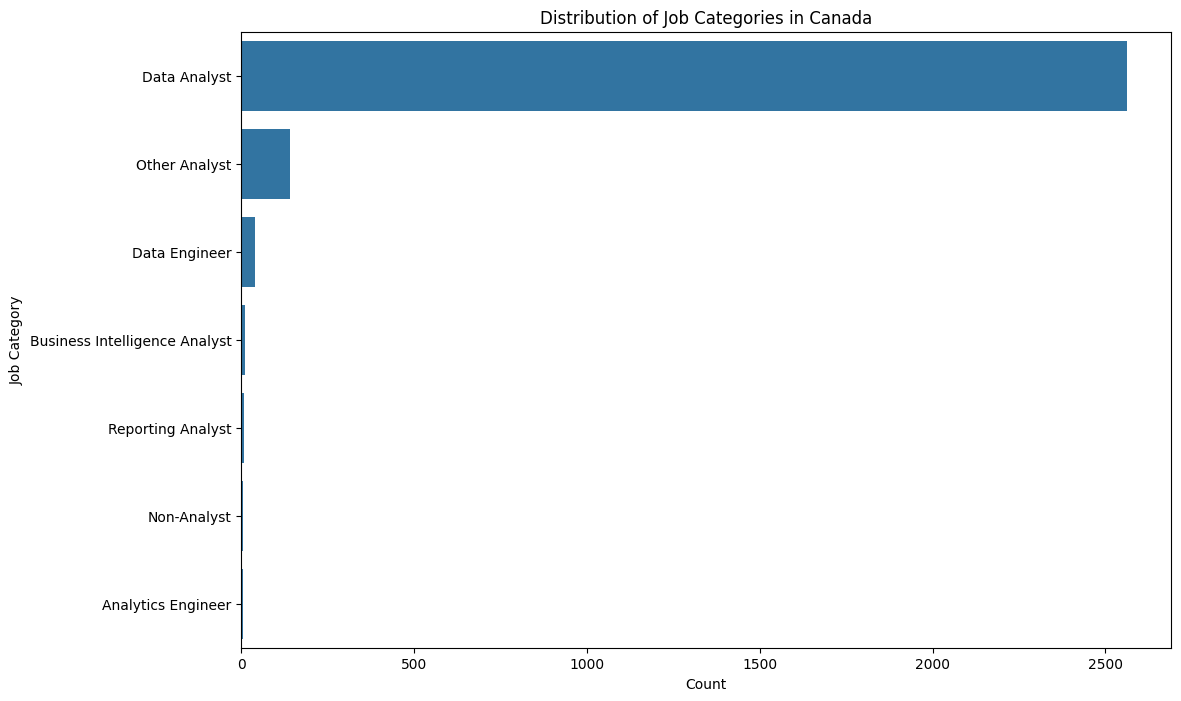

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='job_category', order=df['job_category'].value_counts().index)
plt.title('Distribution of Job Categories in Canada')
plt.xlabel('Count')
plt.ylabel('Job Category')
plt.show()

In [12]:
#Breaking down and identifying categories in 'other_analysts' and 'non_analyst
other_analysts = df[df['job_category'] == 'Other Analyst']
print("\n\n Other Analyst Breakdown\n\n")
print(other_analysts['title'].value_counts().head(10))

print("\n\n Non Analyst Breakdown\n\n")
non_analysts = df[df['job_category'] == 'Non-Analyst']
print(non_analysts['title'].value_counts().head(10))



 Other Analyst Breakdown


title
Insights Analyst                                              38
Data Entry/ JR Analyst -6 Month Contract                      37
Data Visualization Developer/Analyst                          34
Data Research Analyst, Trilogy (Remote) - $60,000/year USD     6
Business Systems Analyst                                       4
Data Science Analyst (Remote)                                  3
Technical Support Analyst                                      3
Data Governance Analyst                                        2
ANALYSTE BI                                                    2
Data Entry Analyst (Risk)                                      2
Name: count, dtype: int64


 Non Analyst Breakdown


title
Quantitative Data Intern                           2
Data Specialist                                    2
Job Opportunity: Data Stage Developer || Remote    1
Researcher                                         1
Name: count, dtype: int64


### More Preprocessing of "Experience_years"

In [ ]:
import re

# Preprocessing the description column
df['description_cleaned'] = df['description'].str.lower().str.strip()


# Defining a comprehensive regex pattern
experience_pattern = r'(?:(?:minimum|min\.?|at least|over|more than)\s*)?(\d+)\s*(?:[-–—to]+\s*(\d+))?\s*(?:\+)?\s*years?(?:\s*(?:of)?\s*experience)?'


# Extracting experience data using the regex pattern
experience_data = df['description_cleaned'].str.extract(experience_pattern)

# Creating new columns for minimum and maximum experience
df['experience_min'] = experience_data[0].astype(float) 
df['experience_max'] = experience_data[1].astype(float)  


# Display a sample of the results
print(df[['description', 'experience_min', 'experience_max']].head(10))

                                         description  experience_min  \
0  Axonify is an intelligent workforce enablement...             1.0   
1  The ideal candidate will use their passion for...             1.0   
2  Company DescriptionWood Mackenzie is the globa...            45.0   
3  1 Part Time Permanent PositionDATE: November 1...             1.0   
4  Position: Data AnalystWork Locations: Toronto,...             NaN   
5  Job Id: 22544507This role is for a Data Analys...             4.0   
6  Job DescriptionKing’s Technology Evaluation Ce...             NaN   
7  Join a team of passionate thought leaders in a...             NaN   
8  Skills Required:• Proficient in using SQL for ...             NaN   
9  Overview Who are we? Vubiquity, an Amdocs comp...             NaN   

   experience_max  
0             2.0  
1             2.0  
2            45.0  
3             2.0  
4             NaN  
5             4.0  
6             NaN  
7             NaN  
8             NaN  
9      

In [ ]:
from word2number import w2n


up_to_pattern = r'(?:up to|less than)\s*(\d+)\s*years?(?:\s*(?:of)?\s*experience)?'
up_to_data = df['description_cleaned'].str.extract(up_to_pattern)

# Updating experience_min and experience_max for "up to" cases
df.loc[up_to_data[0].notnull(), 'experience_min'] = 0
df.loc[up_to_data[0].notnull(), 'experience_max'] = up_to_data[0].astype(float)





def convert_textual_numbers(description):
    if pd.isnull(description):
        return description
    # Replacing textual numbers with digits
    textual_numbers = {
        'one': '1', 'two': '2', 'three': '3', 'four': '4', 'five': '5',
        'six': '6', 'seven': '7', 'eight': '8', 'nine': '9', 'ten': '10'
    }
    for word, digit in textual_numbers.items():
        description = description.replace(word, digit)
    return description

# Applying textual number conversion
df['description_cleaned'] = df['description_cleaned'].apply(convert_textual_numbers)

# Re-running the extraction after converting textual numbers
experience_data = df['description_cleaned'].str.extract(experience_pattern)
df['experience_min'] = experience_data[0].astype(float)
df['experience_max'] = experience_data[1].astype(float)
df['experience_max'] = df['experience_max'].fillna(df['experience_min'])

       experience_min  experience_max
count     1920.000000     1920.000000
mean        12.728125       12.948438
std         27.476989       27.397465
min          1.000000        1.000000
25%          2.000000        2.000000
50%          3.000000        5.000000
75%          7.000000        7.000000
max        160.000000      160.000000


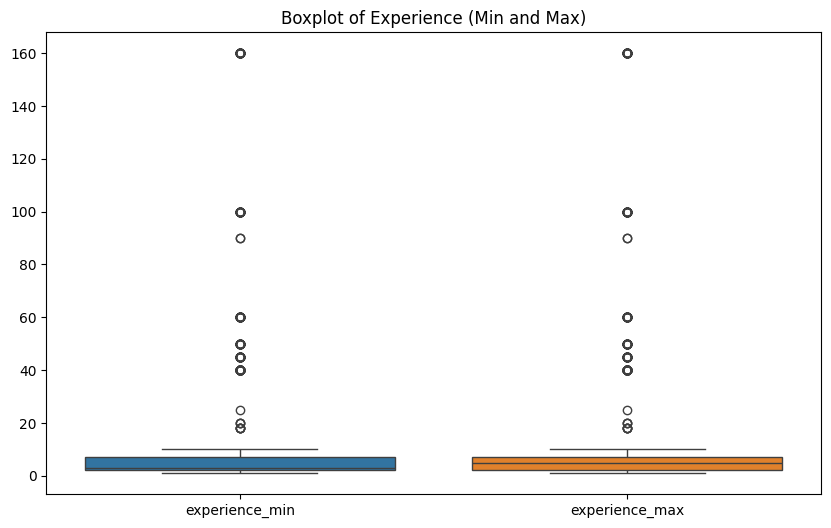

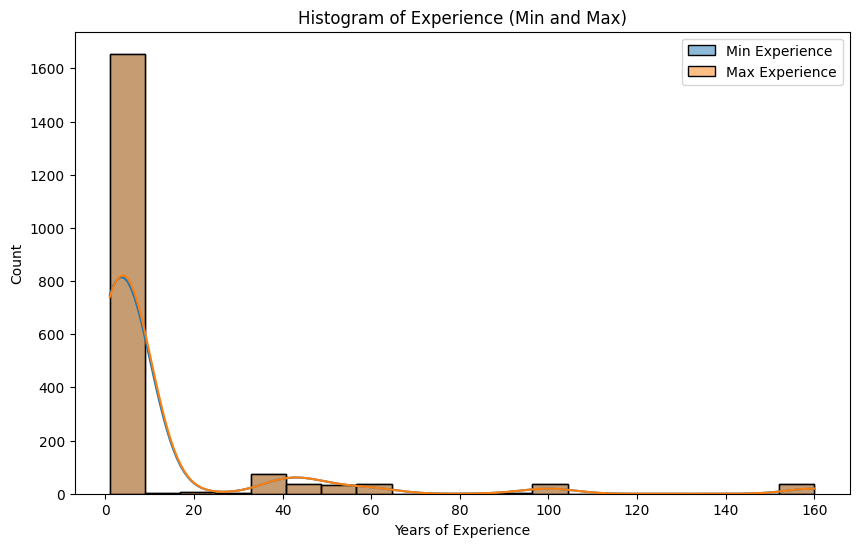

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df[['experience_min', 'experience_max']].describe())

# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['experience_min', 'experience_max']])
plt.title('Boxplot of Experience (Min and Max)')
plt.show()

# Histogram to visualize distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['experience_min'], bins=20, kde=True, label='Min Experience')
sns.histplot(df['experience_max'], bins=20, kde=True, label='Max Experience', alpha=0.5)
plt.title('Histogram of Experience (Min and Max)')
plt.xlabel('Years of Experience')
plt.legend()
plt.show()

In [ ]:
# Calculating median experience by job category
median_min_by_category = df.groupby('job_category')['experience_min'].median()
median_max_by_category = df.groupby('job_category')['experience_max'].median()

# Imputing missing values based on job category
df['experience_min'] = df.apply(
    lambda row: median_min_by_category[row['job_category']] if pd.isnull(row['experience_min']) else row['experience_min'],
    axis=1
)
df['experience_max'] = df.apply(
    lambda row: median_max_by_category[row['job_category']] if pd.isnull(row['experience_max']) else row['experience_max'],
    axis=1
)


# Defining reasonable bounds
lower_bound = 0
upper_bound = 20

# Cap outliers
df['experience_min'] = df['experience_min'].clip(lower=lower_bound, upper=upper_bound)
df['experience_max'] = df['experience_max'].clip(lower=lower_bound, upper=upper_bound)

## Exploratory Data Analysis

### Skill Analysis

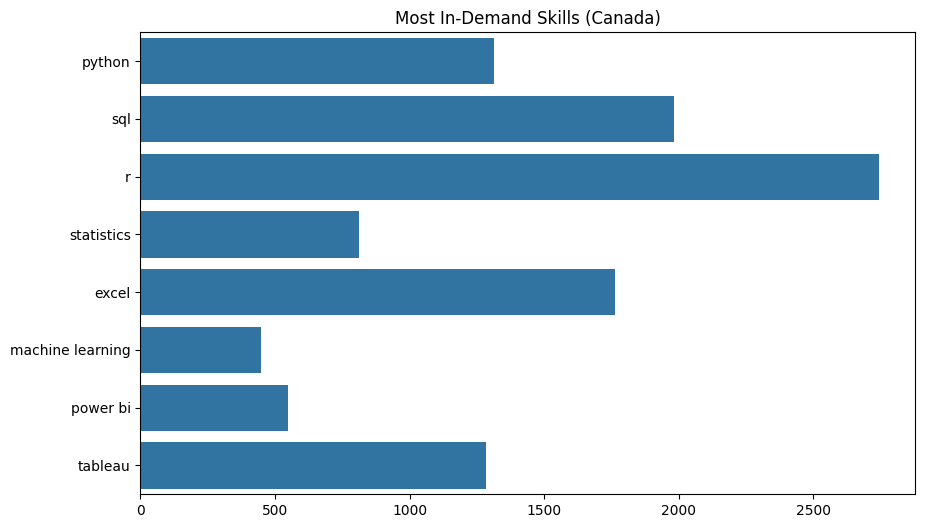

In [ ]:
from collections import Counter
import re

#Extracting common skills (e.g., Python, SQL, Excel)
skills_list = ['python', 'sql', 'excel', 'tableau', 'power bi', 'r', 'statistics', 'machine learning']
def extract_skills(description):
    description = description.lower()
    skills_found = [skill for skill in skills_list if skill in description]
    return skills_found

df['skills'] = df['description'].apply(extract_skills)

# Flatten the list of skills and count frequencies
all_skills = [skill for sublist in df['skills'] for skill in sublist]
skill_counts = Counter(all_skills)

# Visualizing top skills
plt.figure(figsize=(10, 6))
sns.barplot(x=list(skill_counts.values()), y=list(skill_counts.keys()))
plt.title('Most In-Demand Skills (Canada)')
plt.show()

### Top Job Titles

title
Data Analyst                                               1263
Senior Data Analyst                                         182
Senior Data Analyst, Analytics & Insights (Toronto, ON)      68
Sr. Data Analyst                                             61
Insights Analyst                                             38
Data Analyst (Python/SQL)                                    38
Data Analyst (12 Month Contract)                             38
Data Analyst/Developer                                       37
Data Entry/ JR Analyst -6 Month Contract                     37
Data Analyst, Operations                                     37
Name: count, dtype: int64


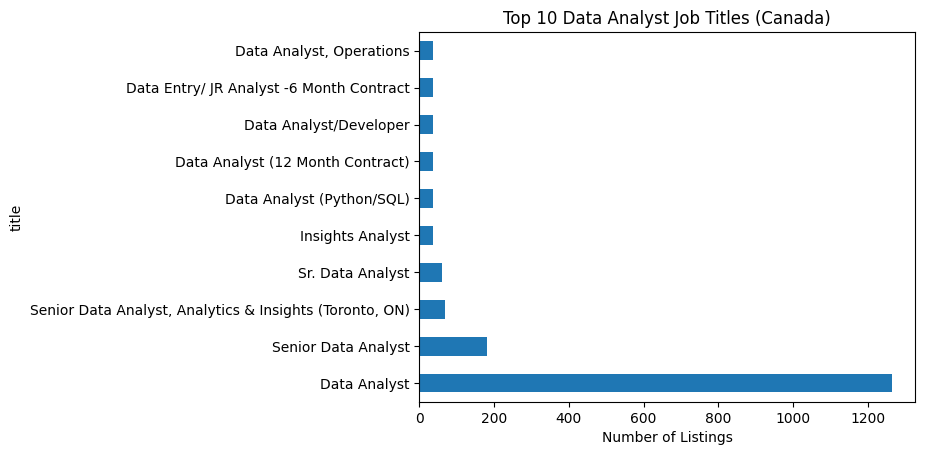

In [20]:
print(df['title'].value_counts().head(10))


import matplotlib.pyplot as plt
df['title'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Data Analyst Job Titles (Canada)')
plt.xlabel('Number of Listings')
plt.show()



 Top Hiring Companies: 
 
company
SSENSE                           133
Synechron                        110
Diverse Lynx                      91
Citi                              76
Onlia                             72
theScore                          72
Crossover                         43
Capgemini                         39
Westland Insurance Group Ltd.     39
Magna International               39
Name: count, dtype: int64

 Top Locations: 

location
Toronto, Ontario, Canada               981
Mississauga, Ontario, Canada           401
Canada                                 366
Vancouver, British Columbia, Canada    172
Montreal, Quebec, Canada                94
Ontario, Canada                         84
Calgary, Alberta, Canada                77
Guelph, Ontario, Canada                 74
Edmonton, Alberta, Canada               43
Oakville, Ontario, Canada               40
Name: count, dtype: int64
onsite_remote
onsite    975
hybrid    950
remote    848
Name: count, dtype: int64


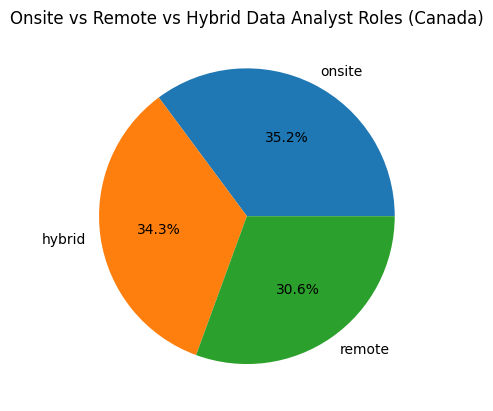

In [23]:
#Top Hiring companies
print("\n Top Hiring Companies: \n ")
print(df['company'].value_counts().head(10))


#Top Locations
print("\n Top Locations: \n")
print(df['location'].value_counts().head(10))

#Distribution of Onsite/remote/hybrid roles
print(df['onsite_remote'].value_counts())
df['onsite_remote'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Onsite vs Remote vs Hybrid Data Analyst Roles (Canada)')
plt.ylabel('')
plt.show()



## Job Criteria and Description Analysis

In [29]:
#Counting how many job descriptions mention 'python'
print("\n Number of SQL mentions")
df['has_python'] = df['description'].str.lower().str.contains('python')
print(df['has_python'].sum())

#Counting how many job descriptions mention "sql"
print("\n Number of SQL mentions")
df['has_sql'] = df['description'].str.lower().str.contains('sql')
print(df['has_sql'].sum())

#Counting how many job descriptions mention "excel"
print("\n Number of Excel mentions")
df['has_excel'] = df['description'].str.lower().str.contains('excel')
print(df['has_excel'].sum())

#Counting how many job descriptions mention "R"
print("\n Number of R mentions")
df['has_r'] = df['description'].str.lower().str.contains('r')
print(df['has_r'].sum())

from collections import Counter
import re

all_criteria = ' '.join(df['criteria'].dropna().tolist()).lower()
words = re.findall(r'\w+', all_criteria)
common_words = Counter(words).most_common(20)
print(common_words)



 Number of SQL mentions
1314

 Number of SQL mentions
1981

 Number of Excel mentions
1764

 Number of R mentions
2742
[('level', 4392), ('employment', 2742), ('type', 2742), ('seniority', 2541), ('job', 2541), ('function', 2541), ('industries', 2541), ('time', 2385), ('information', 2352), ('full', 2348), ('technology', 2243), ('and', 2174), ('services', 1257), ('it', 1248), ('entry', 1025), ('mid', 826), ('senior', 826), ('consulting', 679), ('development', 449), ('software', 435)]


C:\Users\PrinceAndyBabayi\AppData\Local\Temp\ipykernel_7900\4159852158.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('posted_date').resample('M').size().plot()


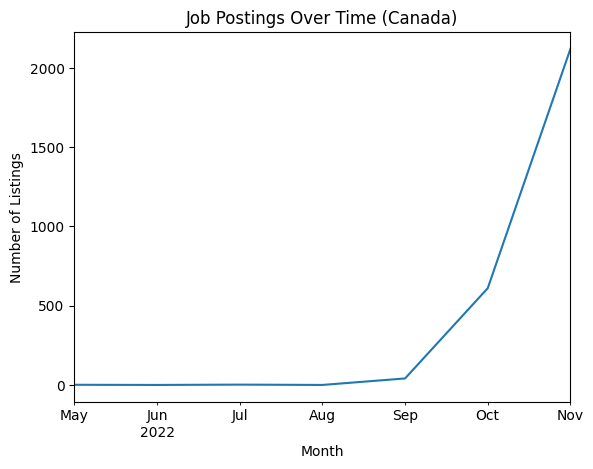

In [25]:
df['posted_date'] = pd.to_datetime(df['posted_date'])
df.set_index('posted_date').resample('M').size().plot()
plt.title('Job Postings Over Time (Canada)')
plt.ylabel('Number of Listings')
plt.xlabel('Month')
plt.show()


### Experience By Job Category

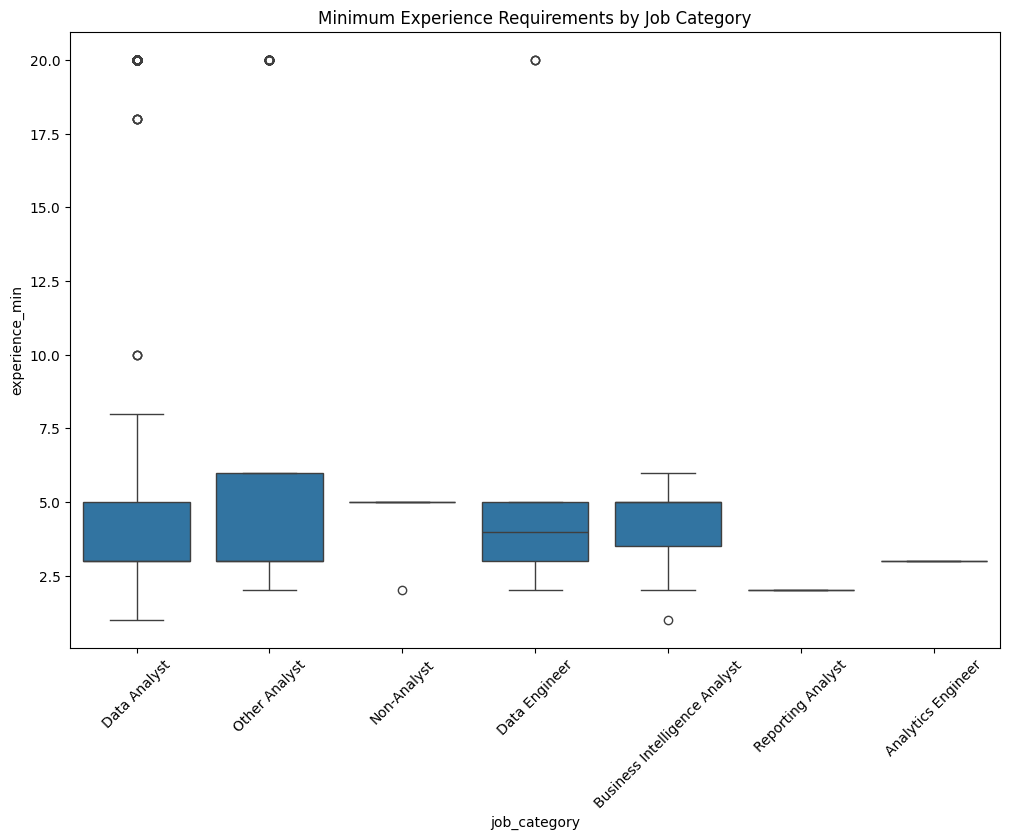

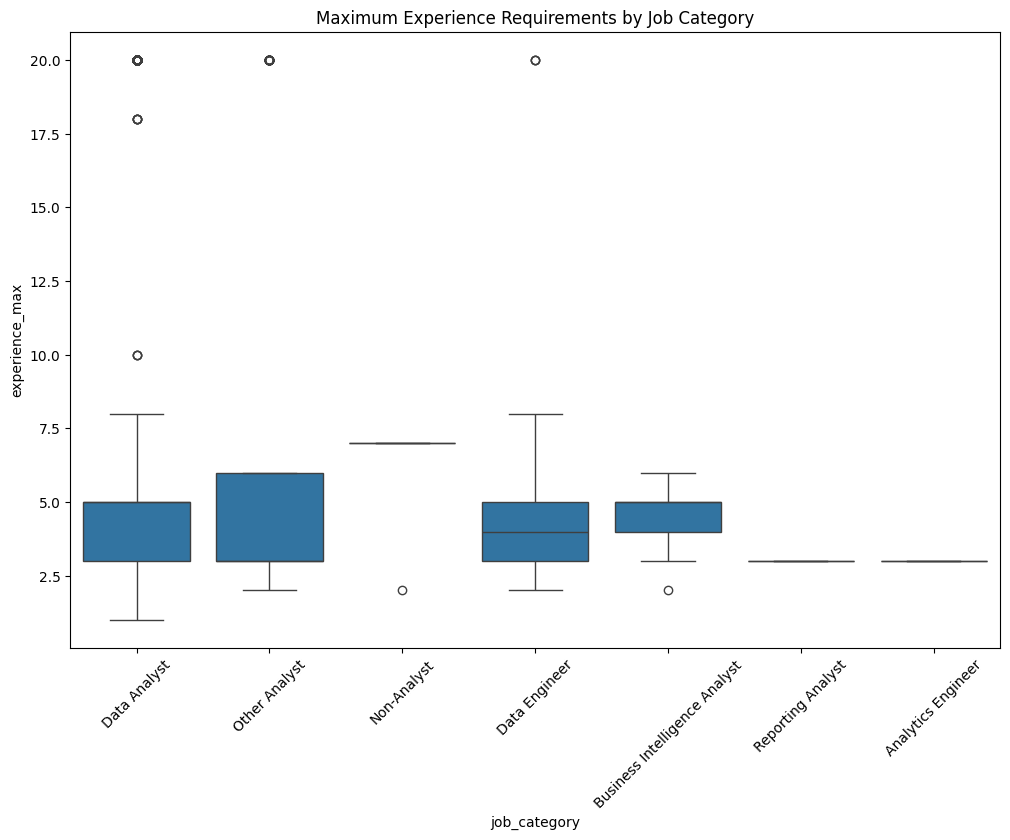

In [26]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='job_category', y='experience_min')
plt.title('Minimum Experience Requirements by Job Category')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='job_category', y='experience_max')
plt.title('Maximum Experience Requirements by Job Category')
plt.xticks(rotation=45)
plt.show()

### Distribution of Experience Requirements

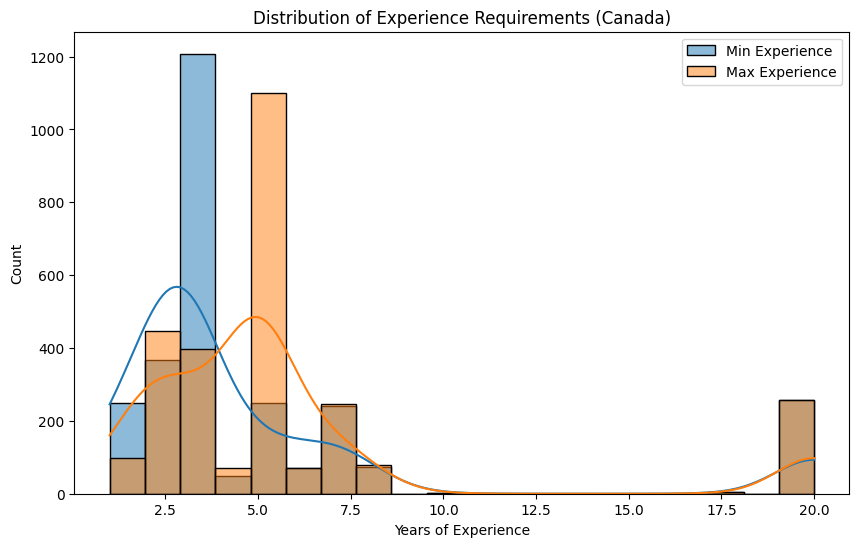

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['experience_min'], bins=20, kde=True, label='Min Experience')
sns.histplot(df['experience_max'], bins=20, kde=True, label='Max Experience', alpha=0.5)
plt.title('Distribution of Experience Requirements (Canada)')
plt.xlabel('Years of Experience')
plt.legend()
plt.show()